In [1]:
# Victor Z
# UW-Madison, 2024
# events for gibbs reactor example

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create data set
path = '/content/drive/MyDrive/StatsBookCode/PythonExercises/'
filename = path+'Data/gibbs_hightemp_class.dat'

datahigh = np.loadtxt(filename)
data = datahigh
datan = data
n = len(datan)

# corrupt data with noise to hide pattern
# note results will be different than Matlab due to use of different seed
np.random.seed(1)  # For reproducibility
P = datan[:, 1] + np.random.randn(n)  # pressure
C = datan[:, 2] + np.random.randn(n) * 0.05  # conversion

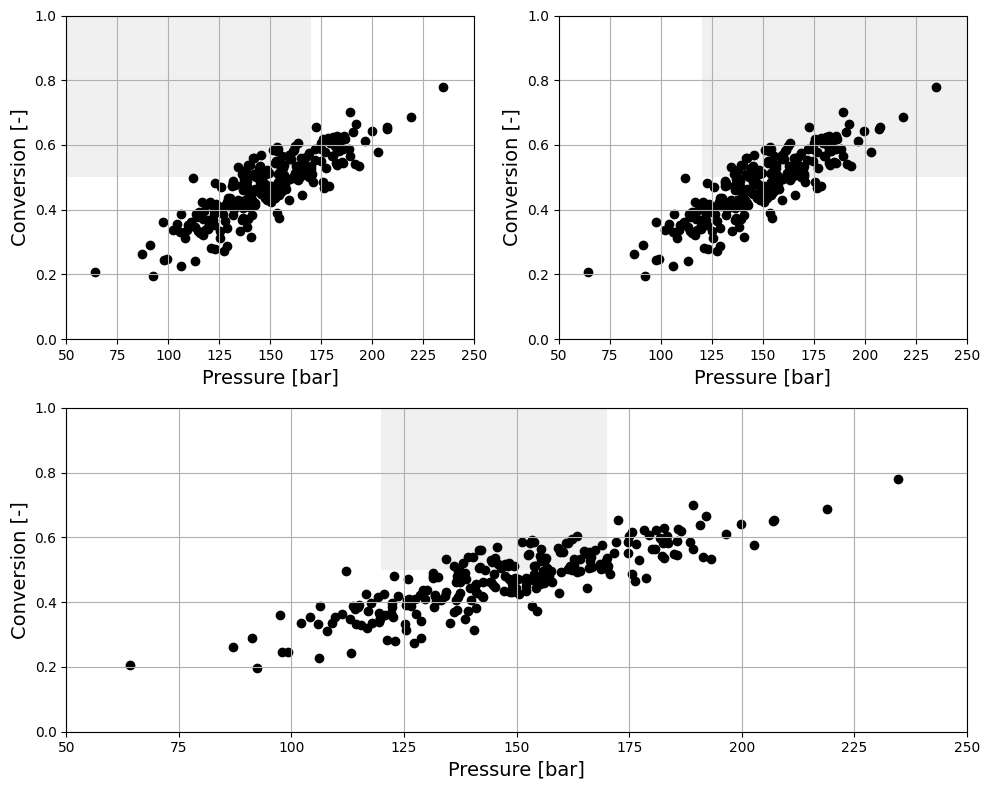

In [ ]:
plt.figure(figsize=(10, 8))

# subplot for the joint probability domain
plt.subplot(2, 2, (3, 4))
plt.fill([50, 170, 170, 50], [0.5, 0.5, 1, 1], 'w')
plt.fill([120, 250, 250, 120], [0.5, 0.5, 1, 1], 'w')
plt.fill([120, 170, 170, 120], [0.5, 0.5, 1, 1], '#F0F0F0')
plt.scatter(P, C, c='black', edgecolors='black')
plt.grid(True)
plt.xlabel('Pressure [bar]', fontsize=14)
plt.ylabel('Conversion [-]', fontsize=14)
plt.xlim(50, 250)
plt.ylim(0, 1)

# subplot for the marginal probability domain A
plt.subplot(2, 2, 1)
plt.fill([0, 170, 170, 0], [0.5, 0.5, 1, 1], '#F0F0F0')
plt.scatter(P, C, c='black', edgecolors='black')
plt.grid(True)
plt.xlabel('Pressure [bar]', fontsize=14)
plt.ylabel('Conversion [-]', fontsize=14)
plt.xlim(50, 250)
plt.ylim(0, 1)

# subplot for the marginal probability domain B
plt.subplot(2, 2, 2)
plt.fill([120, 250, 250, 120], [0.5, 0.5, 1, 1], '#F0F0F0')
plt.scatter(P, C, c='black', edgecolors='black')
plt.grid(True)
plt.xlabel('Pressure [bar]', fontsize=14)
plt.ylabel('Conversion [-]', fontsize=14)
plt.xlim(50, 250)
plt.ylim(0, 1)

plt.tight_layout()


In [ ]:
# get joint probability (A&B)
idx = np.sum((P <= 170) & (P >= 120) & (C >= 0.5))
probAandB = idx / n

# get marginal probability (A)
idx = np.sum((P <= 170) & (C >= 0.5))
probA = idx / n

# get marginal probability (B)
idx = np.sum((P >= 120) & (C >= 0.5))
probB = idx / n

# get conditional (A|B)
probAB = probAandB / probB

# get conditional (B|A)
probBA = probAandB / probA

print(f"Joint Probability (A&B): {probAandB}")
print(f"Marginal Probability (A): {probA}")
print(f"Marginal Probability (B): {probB}")
print(f"Conditional Probability (A|B): {probAB}")
print(f"Conditional Probability (B|A): {probBA}")

Joint Probability (A&B): 0.252
Marginal Probability (A): 0.252
Marginal Probability (B): 0.42
Conditional Probability (A|B): 0.6
Conditional Probability (B|A): 1.0
